In [2]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

In [3]:
const.BEHAVE_DIR

PosixPath('/Users/shannonlee/Documents/action_prediction/data/behavior')

In [4]:
# initialize dataset
data = DataSet(task='social_prediction')

#load confirmed participants
df_participants = pd.read_csv("../data/behavior/confirmed_participants.csv")
df_participants = df_participants[['public_id', 'paid_full', 'sex']]
df_participants['participant'] = df_participants['sex'].map({'M': 'male', 'F': 'female'})

# load behavior
df_behav = data.load_behav()
df_behav = df_behav.merge(df_participants, left_on='subj', right_on='public_id')

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [11]:
df_behav.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'actors', 'agents', 'angle',
       'balance_exp', 'block_iter', 'condition_name', 'context', 'corr_key',
       'corr_resp', 'dataset', 'display_trial_feedback', 'extracted',
       'feedback_type', 'hand', 'initiator', 'initiator_start_frames',
       'initiator_start_frames_corr', 'initiator_start_frames_sec',
       'interact_start_frames', 'interact_start_frames_corr',
       'interact_start_frames_sec', 'iti_dur', 'label', 'media',
       'real_start_time', 'replace_stimuli', 'resp_made', 'rt', 'run_iter',
       'run_num', 'sess', 'session_type', 'start_time', 'stim', 'subj', 'task',
       'timestamp', 'timestamp_sec', 'trial_dur', 'trial_type', 'video_end',
       'video_name', 'video_name_corrected', 'video_start', 'block_iter_corr',
       'public_id', 'paid_full', 'sex', 'participant',
       'initiator_condition_name'],
      dtype='object')

In [5]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column
#look into label and condition, initiator + label, etc


In [6]:
df_merged.initiator_condition_name
df_behav.initiator_condition_name

0         male_hard
1       female_hard
2       female_easy
3       female_easy
4       female_easy
           ...     
7519    female_easy
7520      male_easy
7521      male_hard
7522      male_easy
7523    female_easy
Name: initiator_condition_name, Length: 7524, dtype: object

# Background

As evolutionarily social beings, humans constantly interact with and communicate with others. In order to reciprocate and engage in successful interactions, we rely on social cues and environmental context to predict what others will do in a given situation. It is essential for humans to simultaneously process multiple sensory sources including spoken language, facial expressions, eye contact, and bodily motion to quickly respond to and gauge behavior in social settings.


Of fundamental importance to everyday observation is the role of our eye movements in providing visual input about our environmental and social contexts. In terms of our social communication and adaptation capabilities, eye movements may heavily contribute to interaction prediction, and our focal patterns may inform which cues we most visually depend on in making accurate social assessments. One way this has been quantified is through eye-tracking methods and corresponding behavioral measures. How do we visually integrate various information sources in coordinated human interactions, such as when engaging in a hug or a handshake? What specific human-based cues do we tend to focus on and utilize in predicting someone’s social behavior and related movements?


# Thesis Questions

1. Do people learn to predict social interactions over time?

Measure accuracy, % correct response to our social prediction video clips, grouped by run # over time.  This graph visually suggests that there is a slight upward trend in terms of increased accuracy over the course of all runs over time, so we are now looking into the statistical significance of these outcomes.


2. Based on these results, it is evident that participants are learning how to make better/ more informed predictions. What factors/ strategies might be able to explain the changes in learning? Or how are participants adapting to make more accurate  predictions?


3. How can we explain social prediction learning with "social" behavioral data features vs. "neural correlates"(eye-tracking metrics)? 

    - Comparison of differences w/r/t accuracy between male/female, hug/handshake, etc. 
    - Build a linear model just with these social features, and see how well it explains learning. 
    - Then compare this social model with the neural model (based on eyetracking metrics)
    

4. Exploration and Future Directions

This exploratory data through modelling could form the basis of another experimental hypothesis based on biased learning/ gendered social communication.




In [7]:

# initialize plotting style
vis.plotting_style()

<Figure size 600x600 with 0 Axes>

#### Next steps
Statistical test to show whether there is a statistically significant difference between condition_names

# 1. Do people learn to predict social interactions over time?

Measure accuracy, proportion correct response to our social prediction video clips, grouped by run # over time.  This graph visually suggests that there is a slight upward trend in terms of increased accuracy over the course of all runs over time, so we are now looking into the statistical significance of these outcomes.

### Fig. 1

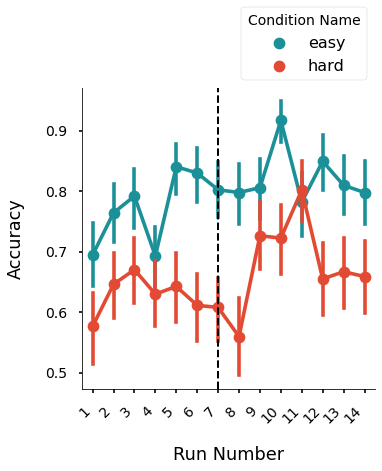

In [8]:
#visualize accuracy across runs
fig1 = vis.plot_acc(dataframe=df_behav, x='run_num', 
                    hue= 'condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Run Number", legend_title = "Condition Name", save_title = 'posterfig1.png')

No handles with labels found to put in legend.


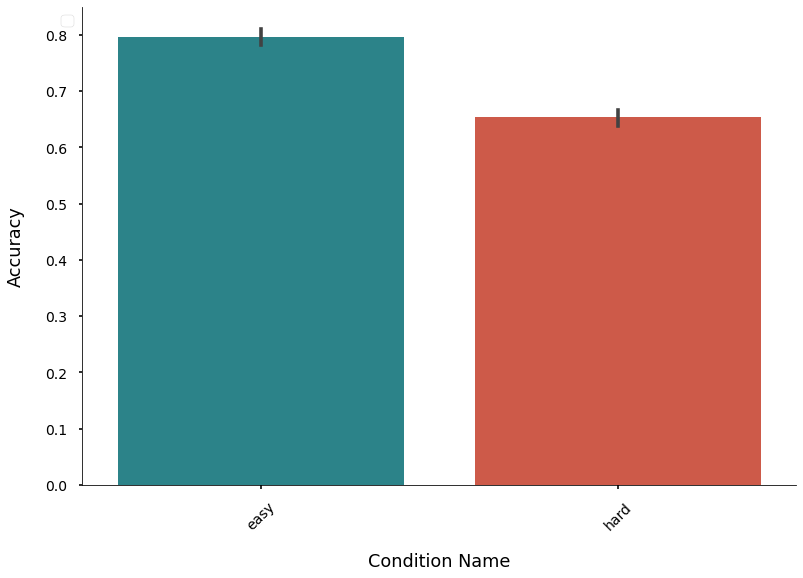

In [9]:
vis.plot_acc(dataframe=df_behav, x='condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Condition Name", save_title = 'posterfig1B.png')

In [10]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

t(20)=6.933775089163084, p=1.0614307386458154e-07


Plot of accuracy changes over time (by run number), broken down by condition_name. Run number 8 indicates the start of the Behavioral Session 2. The hard condition reflected overall lower accuracy percentages compared to the easy condition across participants. 

### Fig. 2

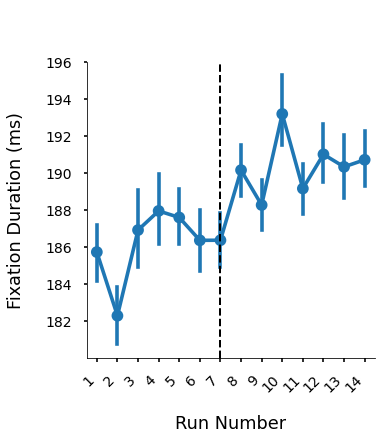

In [73]:

fig2 =vis.plot_fixation_duration(df_merged, x='run_num', hue=None, x_title ="Run Number", save_title = 'posterfig2.png')


In [13]:
# group by whichever variables you are interested
df_grouped2 = df_merged.groupby(['subj', 'sess'])['corr_resp'].mean().reset_index()
df_grouped2# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
#sess1_acc = df_grouped.query('sess=="sess_1"')['corr_resp']
#sess2_acc = df_grouped.query('sess=="sess_2"')['corr_resp']
#t, p = ttest_ind(sess1_acc, sess2_acc)
#print(f't(20)={t}, p={p}')

,subj,sess,corr_resp
0,sAA,1,0.744935
1,sAA,2,0.748462
2,sAA1,1,0.678571
3,sAA1,2,0.797619
4,sAA2,1,0.734369
5,sAA2,2,0.738827
6,sAE,1,0.742407
7,sAE,2,NaN
8,sAO,1,NaN
9,sAO,2,NaN


### Consider reaction time/ accuracy tradeoff

### Fig. 3 


In [14]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column

df_behav["initiator_label"]= df_behav["initiator"] + "_" + df_behav["label"] 
df_merged["initiator_label"]= df_merged["initiator"] + "_" + df_merged["label"] 

No handles with labels found to put in legend.


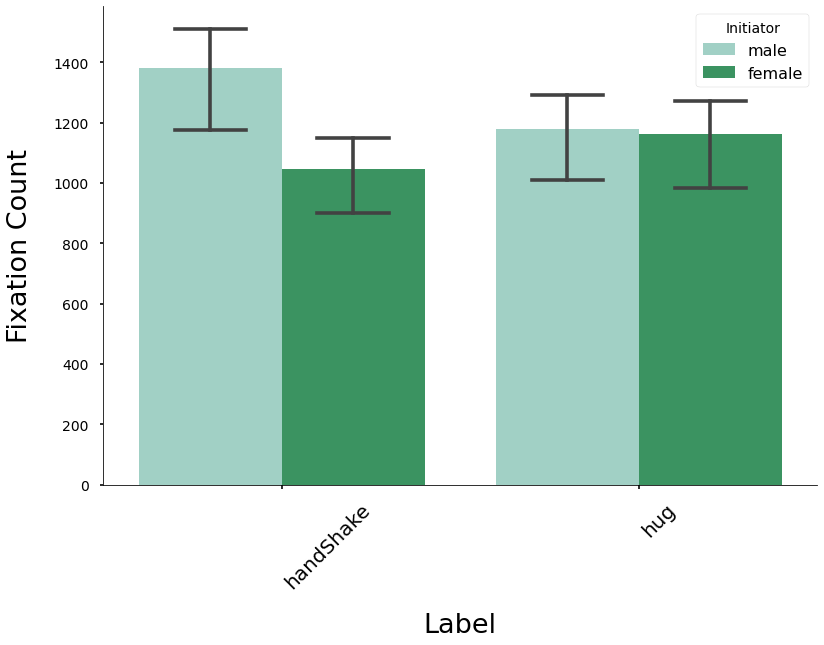

In [76]:
vis.plot_fixation_count(dataframe=df_merged, x='label', x_title='Label', hue= "initiator", legend_title='Initiator', hue_order=['male', 'female'], save_title = "posterfig3.png", palette = ['#99d8c9', '#2ca25f'])


In [15]:
# group by whichever variables you are interested
df_grouped3 = df_merged.groupby(['subj', 'label', 'initiator'])['fixation_count'].mean().reset_index()
df_grouped3
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

KeyError: 'Column not found: fixation_count'

Fixation count by label, initiator, and participant gender. Highest average fixation count for male-initiated handshake condition and lowest for female-initiated handshake condition. Features inform joint “social + eye-tracking” model


In [46]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run an F test
# let's first run an F test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(n-2)={t}, p={p}')

t(n-2)=6.913571081662766, p=1.1212921094271839e-07
